In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [3]:
df = pd.read_csv("data/20200124_is24_buyrent_plus_lieferando.csv", sep=";")
df.head(3).transpose()

,0,1,2
Unnamed: 0,0,1,2
city,Berlin,Berlin,Berlin
hasCourtage,NO,NO,NO
houseNo,13,13,13
id,115408865,115408859,115408828
latitude,52.5504,52.5504,52.5504
longitude,13.2143,13.2143,13.2143
marketingType,PURCHASE,PURCHASE,PURCHASE
n_page_is24,1,1,1
n_room,4,4,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 21 columns):
Unnamed: 0               10015 non-null int64
city                     10015 non-null object
hasCourtage              6740 non-null object
houseNo                  6416 non-null object
id                       10015 non-null int64
latitude                 6363 non-null float64
longitude                6363 non-null float64
marketingType            10015 non-null object
n_page_is24              10015 non-null int64
n_room                   10015 non-null float64
postcode                 10015 non-null int64
privateOffer             10015 non-null bool
purchase_price           6740 non-null float64
purchase_price_per_qm    6734 non-null float64
qm                       10015 non-null float64
quarter                  10015 non-null object
rent_cold                3275 non-null float64
rent_cold_per_qm         3275 non-null float64
street                   6416 non-null object
title

In [5]:
df = df[df["marketingType"] == "PURCHASE"]

In [6]:
df["price_per_qm"] = df["purchase_price_per_qm"] 
df.price_per_qm.fillna(df.rent_cold_per_qm, inplace=True)

In [7]:
[[column, df[column].count() / len(df)] for column in df if df[column].count() / len(df) >= 0.3]

[['Unnamed: 0', 1.0],
 ['city', 1.0],
 ['hasCourtage', 1.0],
 ['houseNo', 0.5364985163204747],
 ['id', 1.0],
 ['latitude', 0.5353115727002967],
 ['longitude', 0.5353115727002967],
 ['marketingType', 1.0],
 ['n_page_is24', 1.0],
 ['n_room', 1.0],
 ['postcode', 1.0],
 ['privateOffer', 1.0],
 ['purchase_price', 1.0],
 ['purchase_price_per_qm', 0.9991097922848665],
 ['qm', 1.0],
 ['quarter', 1.0],
 ['street', 0.5364985163204747],
 ['title', 1.0],
 ['n_restaurant', 0.9986646884272997],
 ['price_per_qm', 0.9991097922848665]]

In [8]:
print(df['price_per_qm'].describe())

count     6734.000000
mean      5385.882106
std       2025.042015
min       1100.000000
25%       4024.250000
50%       4937.800000
75%       6329.875000
max      22800.000000
Name: price_per_qm, dtype: float64


C:\Users\Work\Anaconda3\envs\code_red\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Work\Anaconda3\envs\code_red\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Work\Anaconda3\envs\code_red\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Work\Anaconda3\envs\code_red\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


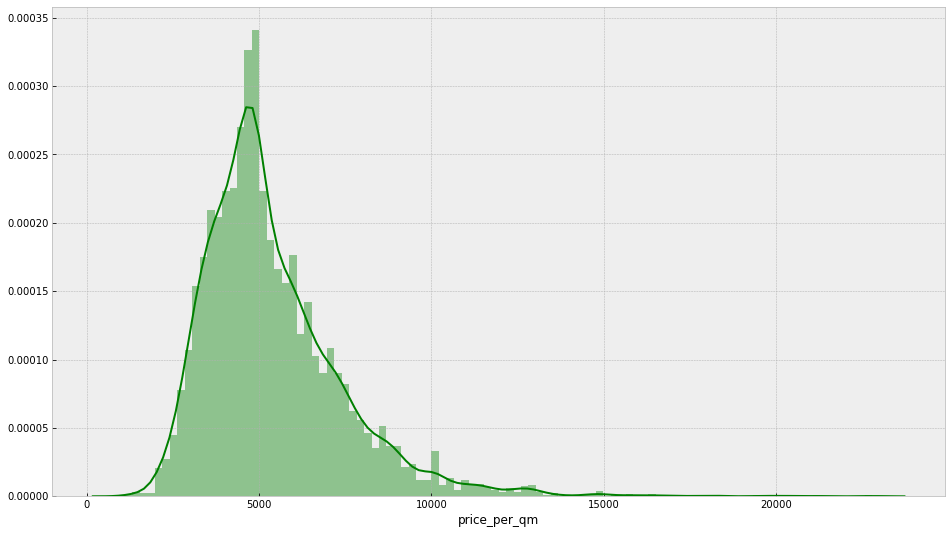

In [9]:
plt.figure(figsize=(16, 9))
sns.distplot(df['price_per_qm'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [10]:
list(set(df.dtypes.tolist()))

[dtype('bool'), dtype('int64'), dtype('float64'), dtype('O')]

In [11]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [12]:
df_num.columns

Index(['Unnamed: 0', 'id', 'latitude', 'longitude', 'n_page_is24', 'n_room',
       'postcode', 'purchase_price', 'purchase_price_per_qm', 'qm',
       'rent_cold', 'rent_cold_per_qm', 'n_restaurant', 'price_per_qm'],
      dtype='object')

In [13]:
df_num = df[['n_room', 'qm', 'n_restaurant', 'price_per_qm']]

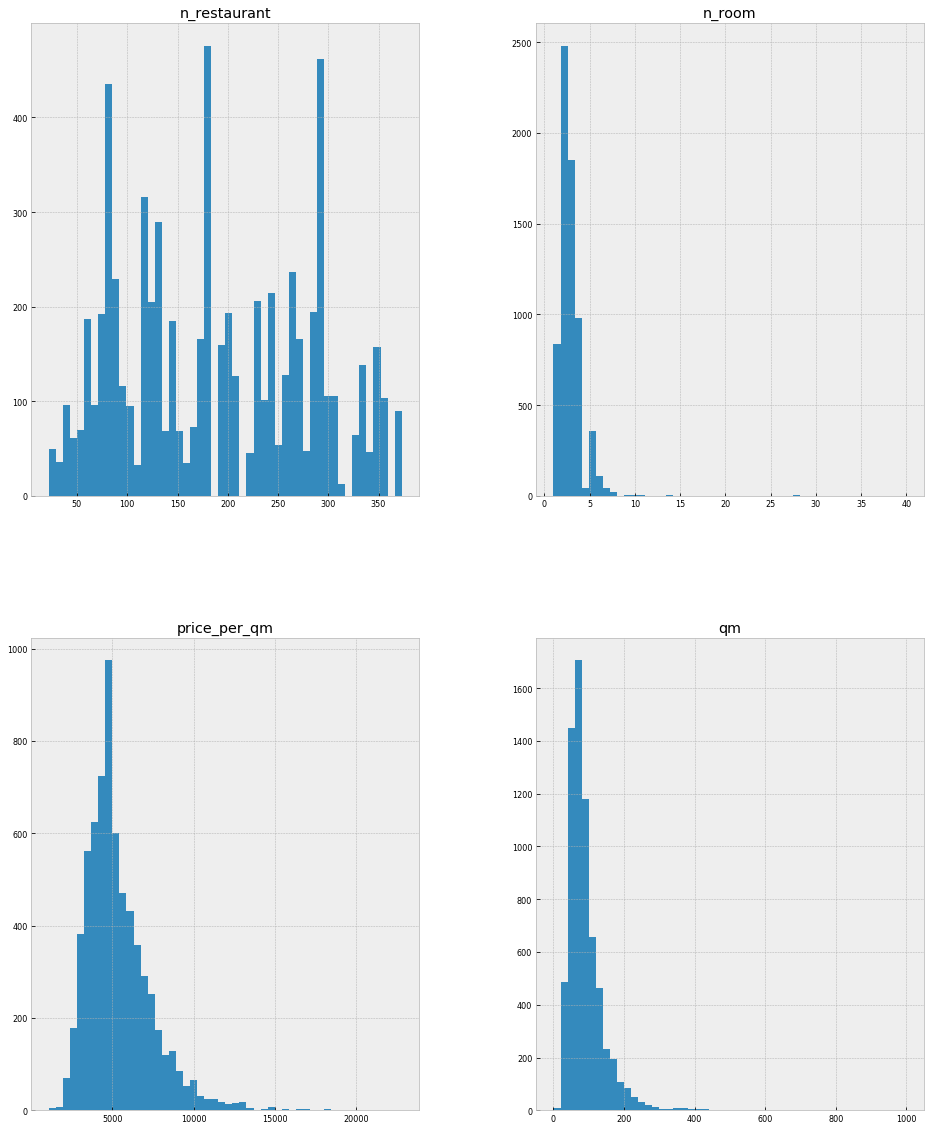

In [14]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [15]:
df_num_corr = df_num.corr()['price_per_qm'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0].sort_values(ascending=False)
print("There is {} strongly correlated values with price_per_qm:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values with price_per_qm:
n_restaurant    0.390593
qm              0.243437
n_room          0.105824
Name: price_per_qm, dtype: float64


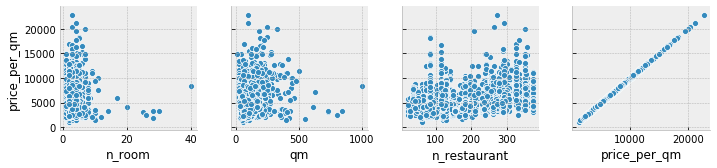

In [16]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['price_per_qm'])

In [17]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'price_per_qm']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['price_per_qm'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

         n_room: 0.10582384666247735
             qm: 0.24343676626033064
   n_restaurant: 0.3905933043122042


In [18]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0]
print("There is {} strongly correlated values with price_per_qm:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values with price_per_qm:
['n_room', 'qm', 'n_restaurant']


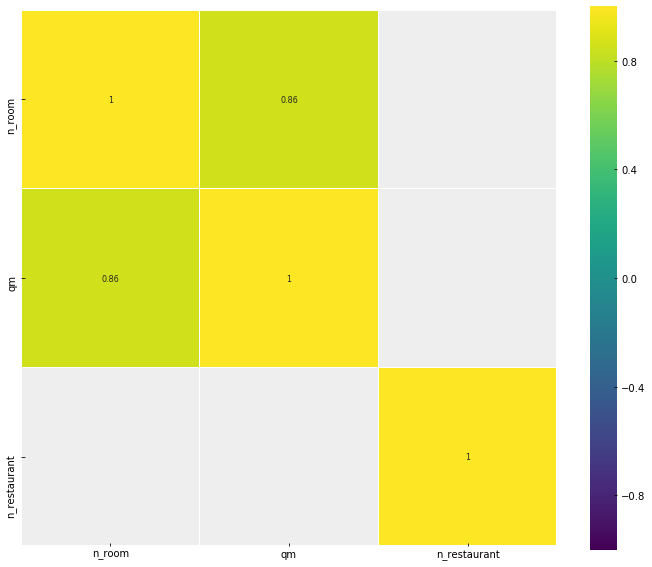

In [19]:
corr = df_num.drop('price_per_qm', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [20]:
features_to_analyse = [x for x in df_num.columns if x in golden_features_list]
features_to_analyse.append('price_per_qm')
features_to_analyse

['n_room', 'qm', 'n_restaurant', 'price_per_qm']

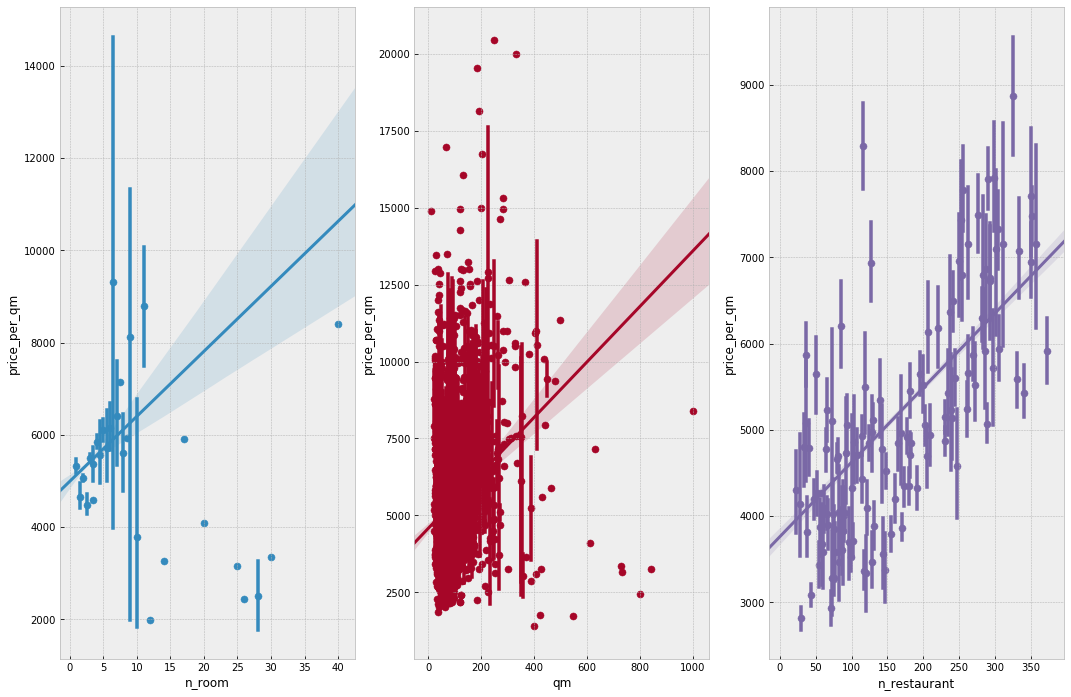

In [21]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='price_per_qm', data=df[features_to_analyse], ax=ax, x_estimator=np.mean)

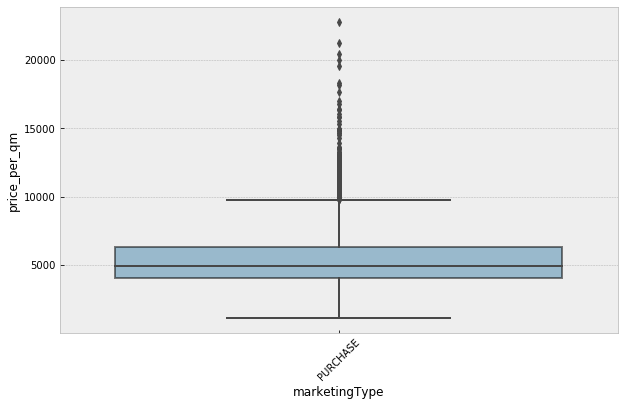

In [22]:
plt.figure(figsize = (10, 6));
ax = sns.boxplot(x='marketingType', y='price_per_qm', data=df);
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k");
plt.xticks(rotation=45);

In [23]:
df[df["marketingType"] == "PURCHASE"]

,Unnamed: 0,city,hasCourtage,houseNo,id,latitude,longitude,marketingType,n_page_is24,n_room,...,purchase_price,purchase_price_per_qm,qm,quarter,rent_cold,rent_cold_per_qm,street,title,n_restaurant,price_per_qm
0,0,Berlin,NO,13,115408865,52.55042,13.21433,PURCHASE,1,4.0,...,705000.0,6752.9,104.40,Spandau (Spandau),NaN,NaN,Parkstraße,Ein hohes Maß an Komfort! Dachgeschoss-Maisone...,82.0,6752.9
1,1,Berlin,NO,13,115408859,52.55042,13.21435,PURCHASE,1,4.0,...,703000.0,6756.4,104.05,Spandau (Spandau),NaN,NaN,Parkstraße,Dachgeschoss-Maisonette-Wohnung mit Ausblick a...,82.0,6756.4
2,2,Berlin,NO,13,115408828,52.55042,13.21435,PURCHASE,1,4.0,...,609000.0,6117.5,99.55,Spandau (Spandau),NaN,NaN,Parkstraße,Modernes Wohnen in direkter Wasserlage im hist...,82.0,6117.5
3,3,Berlin,NO,13,115061351,52.55042,13.21435,PURCHASE,1,4.0,...,604000.0,6058.2,99.70,Spandau (Spandau),NaN,NaN,Parkstraße,Neues Wohnen im historischen Speicher mit unve...,82.0,6058.2
4,4,Berlin,NO,13,113832032,52.55037,13.21432,PURCHASE,1,5.0,...,717000.0,6748.2,106.25,Spandau (Spandau),NaN,NaN,Parkstraße,Einzigartig! Große Dachgeschoss-Maisonette mit...,82.0,6748.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6735,6735,Berlin,YES,NaN,69180394,NaN,NaN,PURCHASE,337,3.5,...,440000.0,4731.2,93.00,Zehlendorf (Zehlendorf),NaN,NaN,NaN,Charmante Wohnung mit Blick ins Grüne,85.0,4731.2
6736,6736,Berlin,YES,29,65847901,NaN,NaN,PURCHASE,337,5.0,...,580000.0,2723.0,213.00,Schöneberg (Schöneberg),NaN,NaN,Heylstrasse,Penthouse-Wohnung auf historischem Altbau!,NaN,2723.0
6737,6737,Berlin,NO,NaN,57228501,NaN,NaN,PURCHASE,337,2.0,...,349000.0,5287.9,66.00,Heiligensee (Reinickendorf),NaN,NaN,NaN,Schöne moderne Eigentumswohnung mit Balkon ***...,41.0,5287.9
6738,6738,Berlin,NO,NaN,51875348,NaN,NaN,PURCHASE,337,2.0,...,130000.0,2166.7,60.00,Reinickendorf (Reinickendorf),NaN,NaN,NaN,"Schöne, ruhige und helle 2 Zimmer Wohnung für ...",120.0,2166.7


In [24]:
df[df["marketingType"] == "RENT"]

,Unnamed: 0,city,hasCourtage,houseNo,id,latitude,longitude,marketingType,n_page_is24,n_room,...,purchase_price,purchase_price_per_qm,qm,quarter,rent_cold,rent_cold_per_qm,street,title,n_restaurant,price_per_qm
